<a href="https://colab.research.google.com/github/svhenrique/ufal/blob/main/Planejamento%20de%20Experimentos/trab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
from math import factorial
from matplotlib import pyplot as plt
import numpy as np
import statistics
import scipy.stats

#2)

In [43]:
p = 0.25 # sucesso
q = 0.75 # fracasso
num_servidores = 2 # número de servidores

def binomial(x):
  return (factorial(n)/(factorial(n-x)*factorial(x)))*(p**x)*(q**(n-x))

probabilidades = []
for x in range(num_servidores+1):
  probabilidade = binomial(x)
  probabilidades.append(probabilidade)

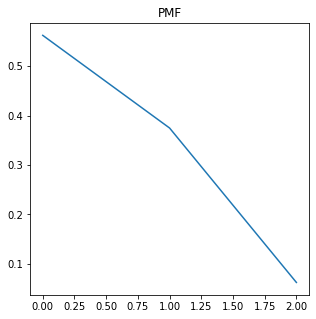

In [44]:
# Gráfico PMF 

lista = probabilidades

plt.figure(figsize=(5,5)) 
plt.ticklabel_format(useOffset=False, style='plain')
plt.title('PMF')

plt.plot(range(num_servidores+1), probabilidades)
plt.show()

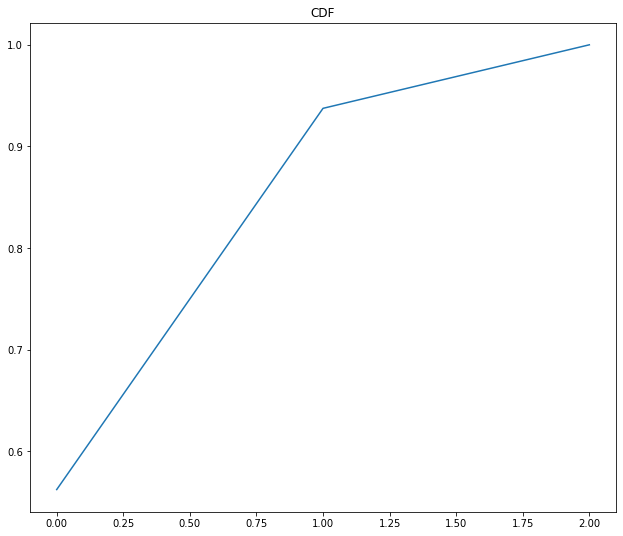

In [45]:
# Gráfico CDF 

def cdf(valor):
  probabilidade = binomial(valor) #lembre-se da função pmf
  for valor_anterior in range(valor-1, -1, -1):
    probabilidade += binomial(valor_anterior)
  return probabilidade
  
valores_cdf = [cdf(valor) for valor in range(num_servidores+1)]

plt.figure(figsize=(10.5,9)) 
plt.ticklabel_format(useOffset=False, style='plain')
plt.title('CDF')


plt.plot(range(n+1), valores_cdf)
plt.show()

#4)

In [46]:
valores = [23, 33, 14, 15, 42, 28, 33, 45, 23, 34, 39, 21, 36, 23, 34, 36,
            25, 9, 11, 19, 35, 24, 31, 29, 16, 23, 34, 24, 38, 15, 13, 35, 28]

## a)

In [47]:
# ordenando, do maior para o menor, para cálculo de percentil
valores.sort()

In [48]:
# 10º percentil
p10 = round(np.percentile(valores, 10))
p10

14

In [49]:
# 90º percentil
p90 = round(np.percentile(valores, 90))
p90

38

In [50]:
np.percentile(valores, range(0, 101))

array([ 9.  ,  9.64, 10.28, 10.92, 11.56, 12.2 , 12.84, 13.24, 13.56,
       13.88, 14.2 , 14.52, 14.84, 15.  , 15.  , 15.  , 15.12, 15.44,
       15.76, 16.24, 17.2 , 18.16, 19.08, 19.72, 20.36, 21.  , 21.64,
       22.28, 22.92, 23.  , 23.  , 23.  , 23.  , 23.  , 23.  , 23.  ,
       23.  , 23.  , 23.16, 23.48, 23.8 , 24.  , 24.  , 24.  , 24.08,
       24.4 , 24.72, 25.12, 26.08, 27.04, 28.  , 28.  , 28.  , 28.  ,
       28.28, 28.6 , 28.92, 29.48, 30.12, 30.76, 31.4 , 32.04, 32.68,
       33.  , 33.  , 33.  , 33.12, 33.44, 33.76, 34.  , 34.  , 34.  ,
       34.  , 34.  , 34.  , 34.  , 34.32, 34.64, 34.96, 35.  , 35.  ,
       35.  , 35.24, 35.56, 35.88, 36.  , 36.  , 36.  , 36.32, 36.96,
       37.6 , 38.12, 38.44, 38.76, 39.24, 40.2 , 41.16, 42.12, 43.08,
       44.04, 45.  ])

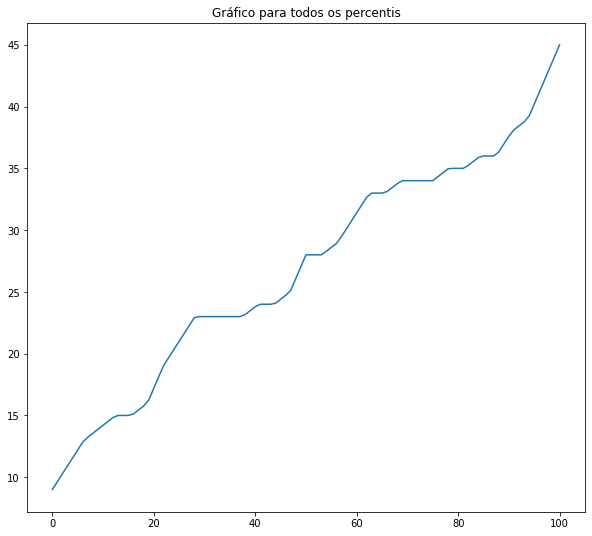

In [51]:
plt.figure(figsize=(10,9)) 
plt.ticklabel_format(useOffset=False, style='plain')
plt.title('Gráfico para todos os percentis')

plt.plot(range(0, 101), np.percentile(valores, range(0, 101)))
plt.show()

## b)

In [52]:
media = statistics.mean(valores)
media

26.90909090909091

## c)

### Qual é o IC de 90%?

In [53]:
desvio_padrao = statistics.variance(valores)**(1/2)

In [54]:
desvio_padrao

9.494615699054242

In [55]:
# Intervalo de confiança

# Função pega no stackoverflow, retorna a média, limite inferior e superior de forma simplificada
def mean_confidence_interval(data, confidence):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

media_, inferior, superior = mean_confidence_interval(valores, 0.9)

In [56]:
# limite inferior e superior do IC
inferior, superior

(24.1094308417321, 29.70875097644972)

### Qual é o maior erro?

In [57]:
# maior erro
z = 1.645 # para IC de 90%
erro = z*(desvio_padrao/len(valores)**(1/2))
erro

2.71885673217557

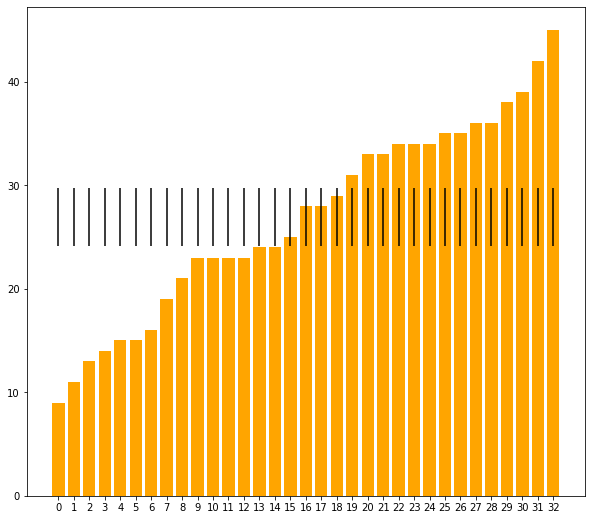

In [58]:
# gráfico de IC (pedido na questão)

means = np.array(valores)
conf = np.array([[inferior, superior]*33])

yerr = np.c_[means-conf[:,0],conf[:,1]-means ].T

plt.figure(figsize=(10,9)) 
plt.bar(range(len(means)), means, yerr=yerr, color="orange")
plt.xticks(range(len(means)))
plt.show()

## d)

In [59]:
# probabilidade de programas que fazem no máximo 25 operações de I/O

escolhidos = []
for valor in valores:
  if valor <= 25:
    escolhidos.append(valor)

probabilidade = len(escolhidos)/len(valores)
probabilidade

0.48484848484848486